## Loading the IMDB dataset

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

## Prepare the data

Encoding the integer sequences into a binary matrix

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    # create all zero matrix of shape
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        # sets specific indicies of results[i] to 1
        results[i, sequence] = 1.

    return results

# vectorize train
x_train = vectorize_sequences(train_data)

# vectorize test
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building your network

The model definition

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Compiling your code

In [9]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
     

Configuring the optimizer

In [11]:

from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
#ignore warning
import warnings
warnings.filterwarnings("ignore")

Using custom losses and metrics

In [12]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
              loss = losses.binary_crossentropy, 
              metrics = [metrics.binary_accuracy])

## Validating your approach

Setting aside a validation set

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model



In [14]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 47ms/step - loss: 0.5257 - acc: 0.7928 - val_loss: 0.3939 - val_acc: 0.8690
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3124 - acc: 0.8979 - val_loss: 0.3083 - val_acc: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2254 - acc: 0.9255 - val_loss: 0.3210 - val_acc: 0.8696
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1771 - acc: 0.9423 - val_loss: 0.2927 - val_acc: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1457 - acc: 0.9533 - val_loss: 0.2818 - val_acc: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1197 - acc: 0.9622 - val_loss: 0.2925 - val_acc: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1000 - acc: 0.9698 - val_loss: 0.3104 - val_acc: 0.8853
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0843 - a

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Plotting the training and validation loss

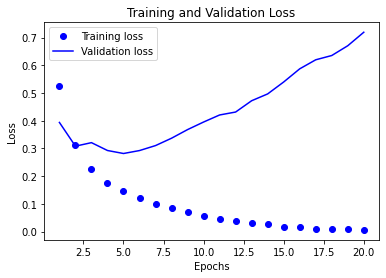

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # bo is for blue dot
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss') # b is for slid blue line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accuracy

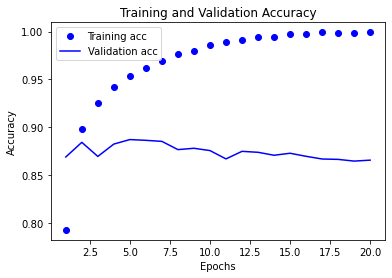

In [17]:
plt.clf() # clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Retraining a model from scratch

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
              
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 12ms/step - loss: 0.4528 - accuracy: 0.8126
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2578 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1986 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2994 - accuracy: 0.8824


In [20]:
results

[0.2993726134300232, 0.8824399709701538]

Using a trained network to generate predictions on new data

In [23]:
model.predict(x_test)


782/782 [==============================] - 2s 2ms/step


array([[0.15783331],
       [0.99911964],
       [0.7369356 ],
       ...,
       [0.08176319],
       [0.03939411],
       [0.42631856]], dtype=float32)